<h1 align="center">Biblioteca de Cálculo Numérico</h1>

Integrantes do trio:
* Carlos Bravo: 119136241
* Gabrielly de Andrade: 116149740
* Markson: X

Essa é uma biblioteca ... disciplina calcnum ... aqui vai ter explicações e exemplos do nosso código show

In [106]:
include("NumericalCalculus.jl");

In [107]:
# Utilizando plotagem disponível em: http://mth229.github.io/graphing.html

import Pkg; Pkg.add("Plots")
using Plots
theme(:lime)

   Resolving package versions...
  No Changes to `C:\Users\Markson\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Markson\.julia\environments\v1.6\Manifest.toml`


## 1. Aproximação de valor

Esse tópico refere-se ao problema 

> 2. Problema: Achar um valor aproximado de uma função com informações de derivadas

### 1.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 1.2 Primeiro exemplo

Vamos aproximar $sen(0.01)$

Repare que temos valores conhecidos para $sen$ pela tabela trigonométrica

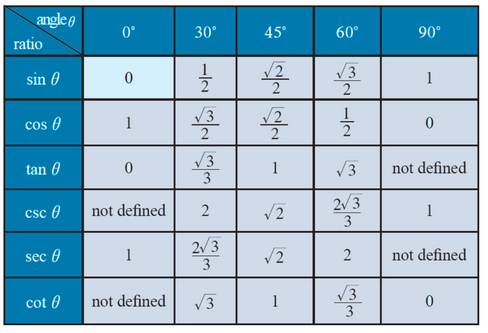

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar **0.01**. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **value_approximation**, vamos explorá-la

In [108]:
?value_approximation

search: value_approximation



## Objetivo

Achar um valor aproximado de uma função com informações de derivadas utilizando o método de Taylor

## Especificação

|y - f(x)|<= E

## Parâmetros de entrada

```
x : Number
    Valor aproximado que queremos calcular a aproximação em y (f(x))

a : Number
    Ponto fixo que será calculado a aproximação
    Idealmente é próximo de x e é conhecida as derivadas no ponto

derivatives : Vector{Number}
    Vetor com informações das derivadas no ponto a: f(a), f'(a), f''(a) ...

M: Number
    Maior valor da n-derivada no intervalo (teto)

n: Int64, optional
    Número de termos do polinômio de Taylor
    Se nenhum valor for passado será calculado o polinômio de ordem 2
```

## Retorno

```
y : Flotat64
    Retorna o valor aproximado de f(x)

E : Float64
    Retorna o erro da aproximação
```

## Exceções

```
AssertionError
    Caso a quantidade de derivadas no vetor seja insuficiente para realizar o 
    cálculo, levanta exeção de domínio
```


Vendo o contrato da função, precisamos 4 parâmetros obrigatórios. Repare que a função sen(x) oscila entre 1 e -1, portanto sua derivada tem um teto de no máximo 1

In [109]:
# Exemplo 1.1 com ordem = 3

f1_1(x) = sin(x)
df1_1(x) = cos(x)
d2f1_1(x) = -sin(x)
d3f1_1(x) = -cos(x)

# Parâmetros obrigatórios
x_1_1 = 0.01
a_1_1=0
derivates_1_1 = [f1_1(a_1_1), df1_1(a_1_1), d2f1_1(a_1_1), d3f1_1(a_1_1)]
M_1_1 = 1

# Parâmetro opcional

ordem_1_1 = 3


value_approximation(x_1_1, a_1_1, derivates_1_1, M_1_1, ordem_1_1)

(0.009999833333333333, 4.166666666666667e-10)

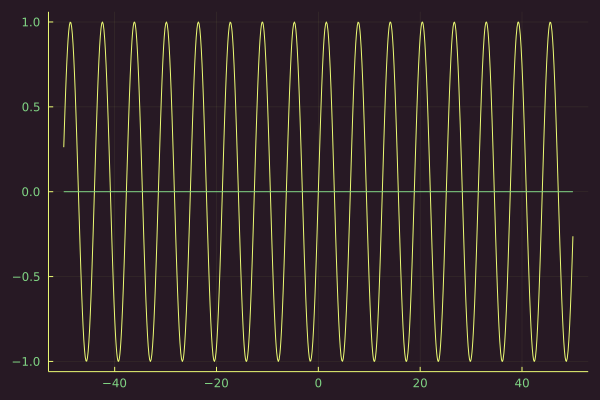

In [110]:
f1_1(x) = sin(x)
plot(f1_1, -50, 50, legend=false) 
plot!(zero)

### 1.2 Segundo exemplo

Vamos aproximar $cos(0.90)$.

Repare que é um pouco parecido com o exemplo anterior, mas dessa vez vamos utilizar a ordem = 2 como padrão

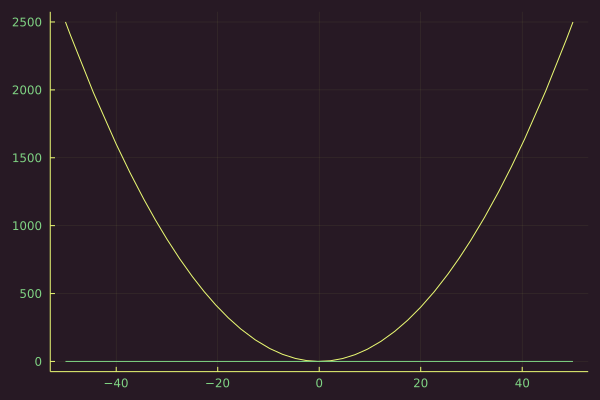

In [111]:
f_1_2(x) = cos(x)
plot(f, -50, 50, legend=false) 
plot!(zero)

In [112]:
# Exemplo 1.2 com ordem padrão = 2

f1_2(x) = cos(x)
df1_2(x) = -sin(x)
d2f1_2(x) = -cos(x)

# Parâmetros obrigatórios
x_1_2 = 0.90
a_1_2=0
derivates_1_2 = [f1_2(a_1_2), df1_2(a_1_2), d2f1_2(a_1_2)]
M_1_2 = 1


value_approximation(x_1_2, a_1_2, derivates_1_2, M_1_2)

(0.595, 0.12150000000000001)

### 1.3 Terceiro exemplo

Vamos aproximar $ln(1.5)$.

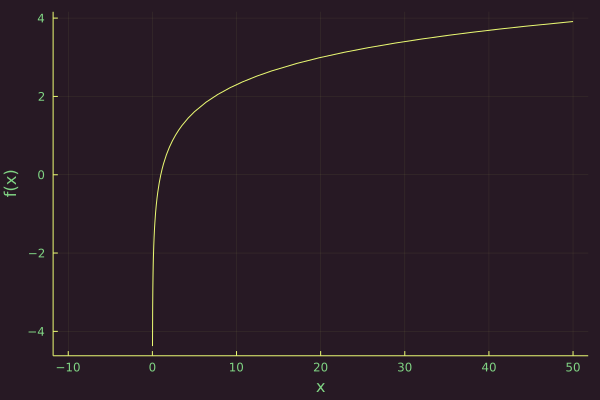

In [113]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

In [114]:
# Exemplo 1.3 com ordem = 3

f1_3(x) = ln(x)
df1_3(x) = 1/x
d2f1_3(x) = -1/(x^2)
d3f1_3(x) = 2/(x^3)

# Parâmetros obrigatórios
x_1_3 = 1.5
a_1_3=1
derivates_1_3 = [f1_3(a_1_3), df1_3(a_1_3), d2f1_3(a_1_3), d3f1_3(a_1_3)]
M_1_3 = 1


value_approximation(x_1_3, a_1_3, derivates_1_3, M_1_3, 3)

(0.4166666666666667, 0.0026041666666666665)

## 2. Aproximação de raiz de função

Esse tópico refere-se ao problema 

> 3. Problema: Encontrar raíz aproximadamente

### 2.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 2.2 Primeiro exemplo

Vamos aproximar $\sqrt[3]{43}$ 

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar esse valor. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **find_root**, vamos explorá-la

In [115]:
?find_root

search: find_root



## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método da Bisseção. Retorna um aviso caso o intervalo passado pelo usuário não possua sinais trocados.

## Especificação

f(r)=0 e |x-r| <= erro

## Parâmetros

```
f : Function
    Recebe uma função 

a : Number
    Início do intervalo

b : Number
    Fim do intervalo

error: Number
    Erro no domínio
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método da Bisseção
```

## Exceções

```
AssertionError
    Caso o intervalo passado não tenha troca de valores no intervalo (sinais opostos) para o método da Bisseção
```

---

## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método de Newton

## Especificação

f(r)=0

## Parâmetros

```
f : Function
    Recebe uma função 

derivative: Function
    Derivada da função f

qtty_iterations: Int64, optional
    Quantidade de interações para ser utilizada no método 
    Caso nenhum valor seja passado será calculado 10 iterações

kick: Float64
    Chute da função inicial para começar a aplicar o método

method: String, optional
    Método que será aplicado a aproximação da raiz da função (:bisecion ou :newton)
    Caso nenhum método seja escolhido o padrão é o da Bisseção
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método de Newton
```


Para aproximar $\sqrt[3]{43}$ temos que pensar em um número tal que $x^3 = 43$, ou seja, podemos pensar em uma função $f(x) = x^3 - 43$.

Vamos utilizar no primeiro exemplo o método de Newton para calcular essa aproximação

In [116]:
# Exemplo 2.1 

# Passo 1: definir a função que queremos aproximar
f_2_1(x) = x^3 - 43

# Passo 2: escolher um chute (valor arbitrário, de preferência que se aproxime do zero da função)

chute_2_1 = 4

# Passo 3: derivar f

derivada_f_2_1(x) = 3x^2

find_root(f_2_1, derivada_f_2_1, chute_2_1)

3.5033980603867243

### 2.3 Segundo exemplo

Agora, vamos aproximar o mesmo valor $\sqrt[3]{43}$, mas dessa vez utilizando o método da bisseção.

Podemos perceber pela documentação da função que podemos passar novos parâmetros para utilizar esse método.
Dessa vez temos que passar além da função um intervalo e um erro.
 

In [117]:
# Exemplo 2.2

find_root(f_2_1, big"-100", big"100", 10^-2)

3.5003662109375

Repare que caso não tivesse sinais trocados no intervalo teríamos recebido um aviso como no exemplo abaixo

In [118]:
# Exemplo 2.2

find_root(f_2_1, big"10", big"100", 10^-2)

LoadError: AssertionError: Aviso!! A função no intervalo passado [10, 100] não possui sinais opostos

### 2.4 Terceiro exemplo

Vamos aproximar $ln(3)$, utilizando o método da bisseção com um erro de $10^{-3}$ no intervalo de 0 a 10

 

Como sabemos calcular $e^x$ podemos utilizar a seguinte relação:

$e^{ln(3)} = e^{x}$ e teremos a relação $x = ln(3)$ que é o que queremos encontrar.


Repare que pela propriedade $ln(e^c) = c$, teremos $ln(e^x) = x$, onde $e^x = 3$

Escrevendo em forma de função e considerando as demais informações no enunciado, temos:

- Função: $f(x) = e^x - 3$
- Erro: $10^{-3}$

Utilizando a função, teremos


In [119]:
# Exemplo 2.3

f_2_3(x) = exp(x) - 3

find_root(f_2_3, 0, 10, 10^(-3))

1.09832763671875

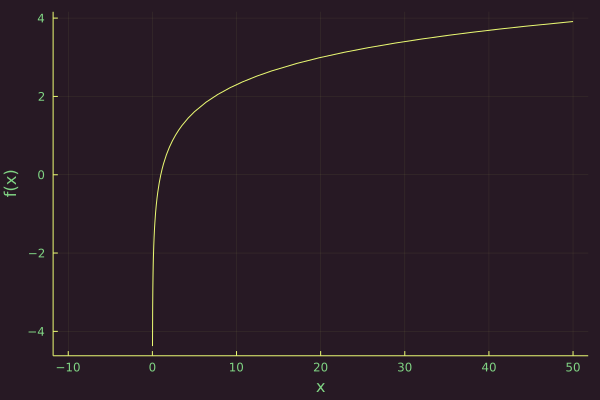

In [120]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

## 3. Interpolação polinomial

Esse tópico refere-se ao problema 

> 4. Problema: Interpolação Polinomial

### 3.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa por todos os pontos dados de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 3.2 Primeiro exemplo

Vamos transformar o seguinte conjunto de pontos $p = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]$ em uma função contínua

O nome da função é **interpolation**, vamos explorá-la

In [121]:
function_3_2(3)

1.1315109615486736

In [122]:
?interpolation

search: interpolation interpolation_2d vandermonde_interpolation



## Objetivo

Transforma um conjunto de pontos discretos em uma função contínua.

## Especificação

Para todo 1<=i<=n, F(x*i)=y*i

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y)

method: Symbol, optional
    Nome do método utilizado para a interpolação
```

## Retorno

```
function : function
    Retorna um polinômio com grau no máximo n-1 (tamanho do vetor de pontos - 1)
```


In [123]:
points_3_2 = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]

function_3_2 = interpolation(points_3_2)


(::var"#f#84"{Int64, Vector{Float64}}) (generic function with 1 method)

In [124]:
function_3_2(3)

1.1315109615486736

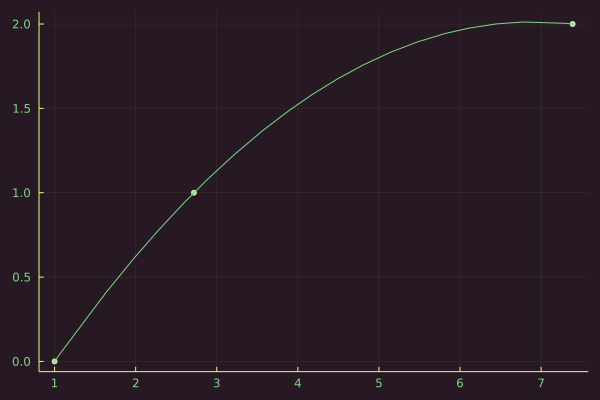

In [125]:
scatter([exp(0); exp(1); exp(2)], [0; 1; 2], c=:lightblue, ms=3, leg=false)
plot!(function_3_2)

### 3.3 Segundo exemplo

Vamos agora testar com um conjunto de pontos que é uma parábola, mas como estamos dando 4 pontos iremos observar que o grau é no máximo 3. Para isso, basta definir o segundo parâmetro da função como grau

In [126]:
points_3_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-50, 2256)]

function_3_3 = interpolation(points_3_3)


(::var"#f#84"{Int64, Vector{Float64}}) (generic function with 1 method)

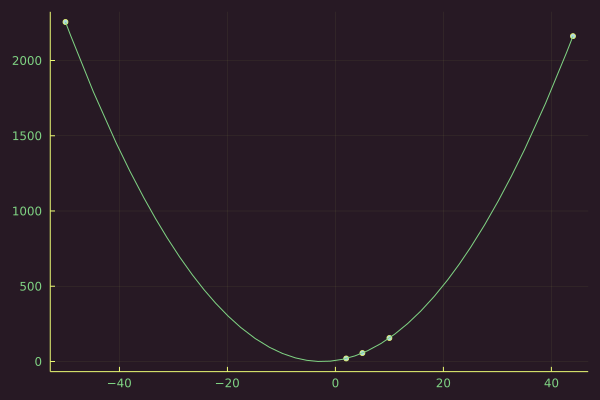

In [127]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_3_3)

### 3.4 Terceiro exemplo

Vamos agora testar com um conjunto de pontos que é o $sen$

In [128]:
points_3_4 = [(pi/2, 1), (0,0), (-pi/2, -1), (-pi, 0)]

function_3_4 = interpolation(points_3_4)


(::var"#f#84"{Int64, Vector{Float64}}) (generic function with 1 method)

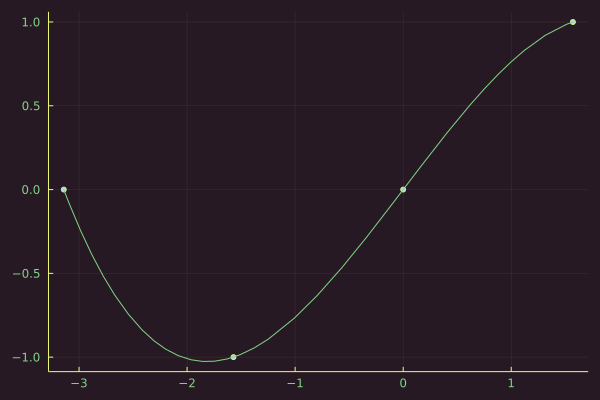

In [129]:
scatter([pi/2, 0, -pi/2, -pi], [1, 0, -1, 0], c=:lightblue, ms=3, leg=false)
plot!(function_3_4)

## 4. Regressão

Esse tópico refere-se aos problemas

> 5. Problema: Regressão Polinomial (“Interpolação aproximada”)
> 6. Problema: Regressão com coeficiente lineares (generalização do problema
anterior)

### 4.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa próximo de todos os pontos com o menor erro, de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 4.2 Primeiro exemplo

Vamos transformar um conjunto de pontos totalmente aleatório, de modo que fique difícil saber exatamente qual o grau do polinômio.

O nome da função é **linear_regression**, vamos explorá-la

In [130]:
?linear_regression

search: linear_regression



## Objetivo

Realizar a regressão com coeficientes lineares

## Especificação

Para todo 1<=i<=n, F(x*i) aproximadamente y*i

## Parâmetros

```
points : Vector{Float64}
    Vetor com coordenadas (x,y)

degree : Int64
    Grau da interpolação

functions: Vector{function}, optional
    Caso esse vetor for passado, será calculado a regressão generalizada
```

## Retorno

```
function : function
    Retorna uma função
```


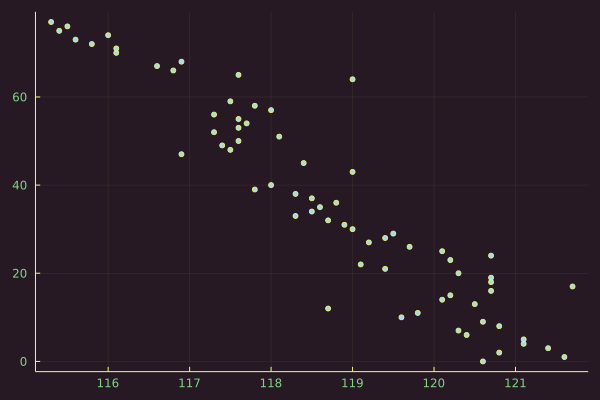

In [131]:
x = [120.6,121.6,120.8,121.4,121.1,121.1,120.4,120.3,120.8,120.6,119.6,119.8,118.7,120.5,120.1,120.2,120.7,121.7,120.7,120.7,120.3,119.4,119.1,120.2,120.7,120.1,119.7,119.2,119.4,119.5,119,118.9,118.7,118.3,118.5,118.6,118.8,118.5,118.3,117.8,118,119,118.4,116.9,117.5,117.4,117.6,118.1,117.3,117.6,117.7,117.6,117.3,118,117.8,117.5,119,117.6,116.8,116.6,116.9,116.1,116.1,115.8,115.6,116,115.4,115.5,115.3]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,45,47,48,49,50,51,52,53,54,55,56,57,58,59,64,65,66,67,68,70,71,72,73,74,75,76,77]

scatter(x, y, c=:lightblue, ms=3, leg=false)

Diferentemente da interpolação, é difícil passar por todos os pontos. Para isso vamos usar a regressão. Pelo contrato da função precisamos de um conjunto de pontos no formato $[(x_0,y_0), ... ,(x_n,y_n)]$

In [132]:
points_4_2 = [(x[i], y[i]) for i in 1:length(x)]

function_4_2 = linear_regression(points_4_2, 4)


(::var"#lr#88"{Int64, Vector{Float64}}) (generic function with 1 method)

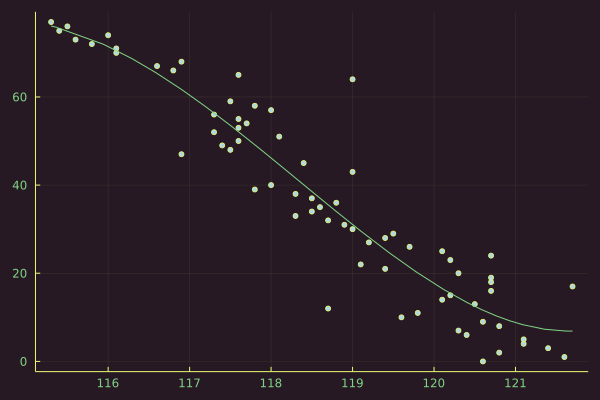

In [133]:
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(function_4_2)

### 4.3 Segundo exemplo

Vamos pegar o mesmo exemplo anterior, mas dessa vez vamos pegar os 5 primeiros pontos e tentar traçar uma reta (grau 1) passando funções de transformação

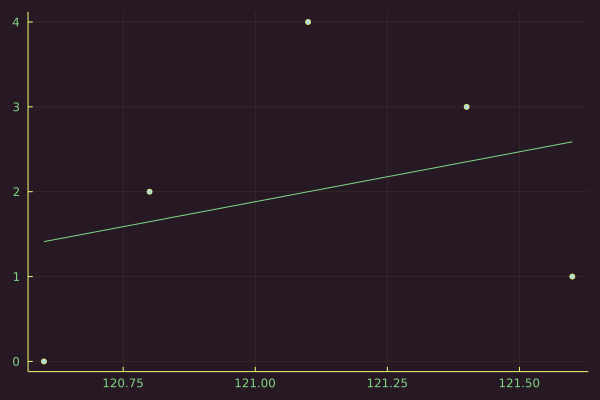

In [134]:
points_4_3 = [(x[i], y[i]) for i in 1:5]

function_4_3 = linear_regression(points_4_3, 1)

scatter(points_4_3, c=:lightblue, ms=3, leg=false)
plot!(function_4_3)


In [135]:
fv1(x) = exp(x)
fv2(x) = 2x + 1
fv3(x) = x^2 + 2x + 1

functions_4_3 = [fv1, fv2, fv3, fv1, fv2]

5-element Vector{Function}:
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)
 fv3 (generic function with 1 method)
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)

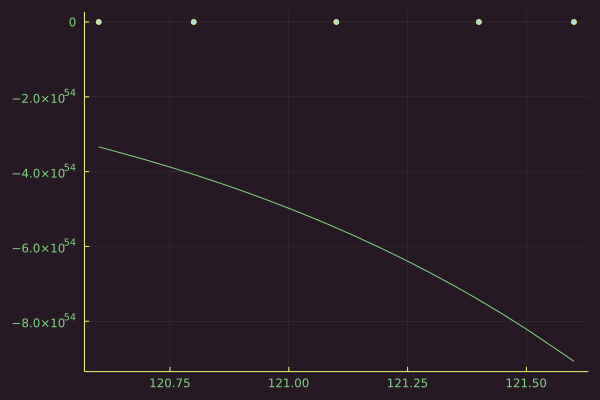

In [136]:
function_4_3 = linear_regression(points_4_3, 1, functions_4_3)

scatter(points_4_3, c=:lightblue, ms=3, leg=false)
plot!(function_4_3)

### 4.4 Terceiro exemplo

Vamos pegar o mesmo exemplo no tópico **3.3**, mas dessa vez vamos delimitar que o retorno seja uma função de grau 2, ou seja, uma parábola. Vamos adicionar somente um pequeno ruído nessa parábola

In [137]:
points_4_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-45, 2256)]

function_4_3 = linear_regression(points_4_3, 2)

(::var"#lr#88"{Int64, Vector{Float64}}) (generic function with 1 method)

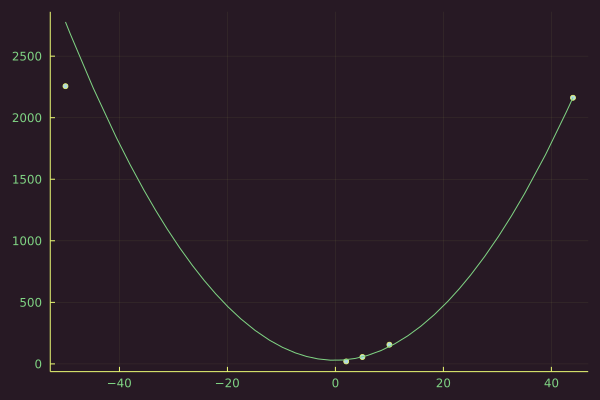

In [138]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_4_3)

## 5. Regressão com coeficientes não-lineares

Esse tópico refere-se ao problema 

> 7. Problema: Regressão com coeficientes não lineares.

### 5.1 Introdução

TODO: TERMINAR A FUNÇÃO

## 6. Interpolação 2D

Esse tópico refere-se ao problema 

> 8. Problema: Interpolação 2D

### 6.1 Introdução

A ideia por trás desse problema é que dado um vetor de coordenadas (x,y) e um vetor de altura (z), queremos conseguir achar uma função de grau 2 e de duas variáveis .

Vamos testar com alguns exemplos da biblioteca com a nossa função **interpolation_2d**

In [139]:
?interpolation_2d

search: interpolation_2d interpolation vandermonde_interpolation



## Objetivo

Realiza a interpolacao 2D (bilinear) dado 4 pontos e suas respectivas alturas

## Especificação

Para todo 1<=i<=n, F(x*i,y*j)=zij

## Parâmetros

```
points : Vector{Float64}
    Vetor com coordenadas (x,y)

z : Vector{Float64}
    Vetor com alturas
```

## Retorno

```
function : function
    Retorna uma função de grau dois de duas variáveis
```


### 6.2 Primeiro exemplo

TODO: PENSAR NOS EXEMPLOS



### 6.3 Segundo exemplo



### 6.4 Terceiro exemplo



## ?. Decomposição LU

Dada uma matriz quadrada $A$ de tamanho $(n,n)$, é possível realizar sua decomposição LU. A decomposição consiste em uma matriz $L$ triangular inferior e uma matriz $U$ triangular superior tal que $A=LU$. O método _lu\_decomposition(matrix)_ recebe uma matriz $A$ e retorna as matrizes $L$ e $U$ de sua decomposição.

### Exemplos

In [140]:
# Exemplo 1: Matriz diagonal

A = Float64.([
    1 0 0;
    0 2 0;
    0 0 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

In [141]:
# Exemplo 2: Matriz triangular inferior

A = Float64.([
    1 0 0;
    5 2 0;
    8 1 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  1.0  0.0
 8.0  0.5  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  2.0  0.0
 8.0  1.0  4.0

In [142]:
# Exemplo 3: Matriz triangular superior

A = Float64.([
    1 7 2;
    0 2 9;
    0 0 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

In [143]:
# Exemplo 4: Matriz densa

A = Float64.([
    1 2 3;
    5 2 9;
    8 1 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0    0.0
 5.0  1.0    0.0
 8.0  1.875  1.0

3×3 Matrix{Float64}:
 1.0   2.0   3.0
 0.0  -8.0  -6.0
 0.0   0.0  -8.75

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 5.0  2.0  9.0
 8.0  1.0  4.0

## ?. Derivada contínua

In [144]:
function continuous_derivative(f, x, h, option=:center)
    @assert(option == :front || option == :back || option == :center, "Opcao invalida, entre com :front, :back ou :center")
    if(option == :front) return (f(x+h) - f(x))/h end
    if(option == :back) return (f(x) - f(x-h))/h end
    if(option == :center) return (f(x+h) - f(x-h))/2h end
end

continuous_derivative (generic function with 2 methods)

In [146]:
f(x) = x^2
continuous_derivative(f, 2, 1e-2, :front)

4.009999999999891

##  Norma do vetor

Esse tópico refere-se ao problema 

> 9. Calcular a norma de um vetor v

### Introdução

Para calcularmos a norma de um vetor precisamos fazer a soma de todos os seus elementos ao quadrados e por fim tirar a raiz quadrada do resultado

In [148]:
?vector_norm

search: vector_norm



## Objetivo

Calcular a norma de um vetor.

## Parâmetros

```
v : Vector{Float64}
    Recebe um vetor
```

## Retorno

```
z : Float64
    Retorna a norma do vetor v
```


### Primeiro exemplo

Vamos calcular a norma do vetor $[3,2]$

In [150]:
v = Float64.([
    3;
    2;
]);

z = vector_norm(v)

3.605551275463989

### Segundo exemplo

In [151]:
v = Float64.([
    6;
    7;
    10;
    1;
    2;
]);

z = vector_norm(v)

13.784048752090222

### Terceiro exemplo

In [152]:
v = Float64.([
    10;
    10;
    10;
    10;
    10;
    10;
]);

z = vector_norm(v)

24.49489742783178